In [1]:
from sqlite3 import *
conn = connect('C:\\Users\\ak66h_000\\Documents\\TEJ.sqlite3')
c = conn.cursor()



get_option("display.max_rows")
get_option("display.max_columns")
set_option("display.max_rows", 100)
set_option("display.max_columns", 1000)
set_option('display.expand_frame_repr', False)
set_option('display.unicode.east_asian_width', True)

def mymerge(x, y):
    m = merge(x, y, on=[col for col in list(x) if col in list(y)], how='outer')
    return m

In [5]:
import requests
from bs4 import BeautifulSoup
from numpy import *
from pandas import *
from functools import *
dic = {1: "綜合損益表-銀行業", 2: "綜合損益表-證券業", 3: "綜合損益表-一般業", 4: "綜合損益表-金控業", 5: "綜合損益表-保險業", 6: "綜合損益表-未知業"}
# dic={1:"綜合損益表_銀行業",2:"綜合損益表_證券業",3:"綜合損益表_一般業",4:"綜合損益表_金控業",5:"綜合損益表_保險業",6:"綜合損益表_未知業"}
error=[]
for key in dic.keys():
    L = []
    for YEAR in ['102','103']:
        for SEASON in ['01', '02', '03', '04']:
            try:
                y = str(int(YEAR)+1911)
                print(y, SEASON, dic[key])
                url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb04'
                headers = {
                    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64; rv:45.0) Gecko/20100101 Firefox/45.0'}
                payload = {'encodeURIComponent': '1', 'step': '1', 'firstin': '1', 'off': '1', 'TYPEK': 'sii', 'year': YEAR, 'season': SEASON}
                source_code = requests.post(url, headers=headers, data=payload)
                source_code.encoding = 'utf-8'
                plain_text = source_code.text
                soup = BeautifulSoup(plain_text, 'html.parser')
                h=['年', '季']
                for th in soup.find_all('table')[key].find_all('tr')[0].find_all('th'):
                    h.append(th.text)
                soup.find_all('table')[key].find_all('tr')[1].find_all('td')
                row=len(soup.find_all('table')[key].find_all('tr'))
                td=soup.find_all('table')[key].find_all('tr')[1].find_all('td')
                l=[h]
                for i in range(1, row):
                    r = [y, SEASON]
                    for j in range(0, len(h)-2):
                        td=soup.find_all('table')[key].find_all('tr')[i].find_all('td')[j].text
                        r.append(td)
                    l.append(r)
                df = DataFrame(l)
                df.columns=df.ix[0,:]
                df=df.ix[1:len(df),:]
                df = df.replace(',', '', regex=True)
                df['公司代號'], df['公司名稱'] = df['公司代號'].str.strip(), df['公司名稱'].str.strip()
                df.to_csv('C:/Users/ak66h_000/OneDrive/webscrap/公開資訊觀測站/彙總報表/綜合損益表/'+dic[key]+'/'+dic[key]+y+SEASON+'.csv', index=False)
                print(df)
                L.append(df) # do not use L=L.append(df)!!
            except Exception as e:
                print(e)
                error.append([y, SEASON, dic[key]])
                pass

C:\Users\ak66h_000\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\ak66h_000\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\ak66h_000\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
C:\Users\ak66h_000\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadat

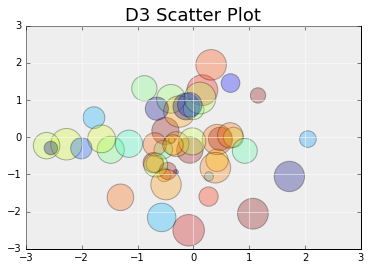

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18);

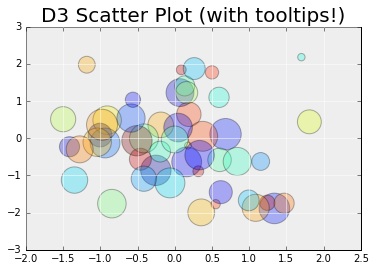

In [4]:
from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]